## Ensemble different techniques for Feature Selection


<img src="Feature Selection Flow.jpg"/>

## Filter Method
- Correlation
- Chi-Square
- f_classif
- mutual_info_classif

## Wrapper Method
- Recursive Feature Elimination

## Embedded Method
- Logistic Regression
- Random Forest
- Light GBM
- XGBoost

We will ensemble various feature selection technique
#### Correlation + Chi-square + f_classif + mutual_info_clasif + RFE + Random Forest + Light GBM + XGBoost


## Let's start

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Reading data
data = pd.read_csv('Desktop/Blog/Feature Selection/attrition_data.csv')

In [114]:
# First 5 rows of data
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [17]:
data['Attrition'] = data['Attrition'].apply(lambda x : 0 if x == 'No' else 1) # Converting 'Yes' to 1 and 'No' to 0

In [30]:
X = pd.get_dummies(data.drop('Attrition', axis=1), drop_first=True) # Creating dummy variables for categorical data
y = data.Attrition

In [31]:
feature_name = X.columns.tolist()

## Correlation

In [32]:
# Correlaion Calculator
def cor_selector(X, y):
    cor_list = []
    # calculating the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-10:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

In [35]:
cor_support, cor_feature = cor_selector(X, y)
print(str(len(cor_feature)), 'selected features')
cor_feature

10 selected features


['StockOptionLevel',
 'YearsWithCurrManager',
 'JobRole_Sales Representative',
 'Age',
 'MonthlyIncome',
 'YearsInCurrentRole',
 'JobLevel',
 'TotalWorkingYears',
 'MaritalStatus_Single',
 'OverTime_Yes']

## Chi-Square

In [101]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler

X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=10)
chi_selector.fit(X_norm, y)

chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
chi_feature

10 selected features


['JobLevel',
 'StockOptionLevel',
 'BusinessTravel_Travel_Frequently',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Sales Representative',
 'MaritalStatus_Single',
 'OverTime_Yes']

## f_classif


In [105]:
f_classif_selector = SelectKBest(f_classif, k=10)
f_classif_selector.fit(X_norm, y)

f_classif_support = f_classif_selector.get_support()
f_classif_feature = X.loc[:,f_classif_support].columns.tolist()
print(str(len(f_classif_feature)), 'selected features')
f_classif_feature

10 selected features


C:\Users\SH20018773\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [ 4 17] are constant.
  UserWarning)


['Age',
 'JobLevel',
 'MonthlyIncome',
 'StockOptionLevel',
 'TotalWorkingYears',
 'YearsInCurrentRole',
 'YearsWithCurrManager',
 'JobRole_Sales Representative',
 'MaritalStatus_Single',
 'OverTime_Yes']

## Mutual_info_classif

In [106]:
mutual_info_classif_selector = SelectKBest(mutual_info_classif, k=10)
mutual_info_classif_selector.fit(X_norm, y)

mutual_info_classif_support = mutual_info_classif_selector.get_support()
mutual_info_classif_feature = X.loc[:,mutual_info_classif_support].columns.tolist()
print(str(len(mutual_info_classif_feature)), 'selected features')
mutual_info_classif_feature

10 selected features


['JobLevel',
 'MonthlyIncome',
 'PerformanceRating',
 'StockOptionLevel',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsWithCurrManager',
 'BusinessTravel_Travel_Frequently',
 'JobRole_Research Director',
 'OverTime_Yes']

## Recursive Feature Elimination

In [57]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=10, step=5, verbose=5)
rfe_selector.fit(X_norm, y)

rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
rfe_feature

Fitting estimator with 47 features.
Fitting estimator with 42 features.
Fitting estimator with 37 features.
Fitting estimator with 32 features.
Fitting estimator with 27 features.
Fitting estimator with 22 features.
Fitting estimator with 17 features.
Fitting estimator with 12 features.
10 selected features


['Age',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'NumCompaniesWorked',
 'TotalWorkingYears',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'JobRole_Research Director',
 'JobRole_Sales Representative',
 'OverTime_Yes']

## Logistic Regression

In [63]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"),"1.25*mean")
embeded_lr_selector.fit(X_norm, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')
embeded_lr_feature

17 selected features


['Age',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'BusinessTravel_Travel_Frequently',
 'JobRole_Laboratory Technician',
 'JobRole_Sales Representative',
 'MaritalStatus_Single',
 'OverTime_Yes']

## Random Forest

In [64]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold='1.25*median')
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
embeded_rf_feature

19 selected features


['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StockOptionLevel',
 'TotalWorkingYears',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager',
 'OverTime_Yes']

## Light GBM

In [66]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, threshold='1.25*median')
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')
embeded_lgb_feature

17 selected features


['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance',
 'YearsWithCurrManager',
 'Department_Research & Development',
 'MaritalStatus_Single',
 'OverTime_Yes']

## XGBoost

In [112]:
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier

embeded_xgb_selector = SelectFromModel(XGBClassifier())
embeded_xgb_selector.fit(X_norm, y)

embeded_xgb_support = embeded_xgb_selector.get_support()
embeded_xgb_feature = X.loc[:,embeded_xgb_support].columns.tolist()
print(str(len(embeded_xgb_feature)), 'selected features')
embeded_xgb_feature

20 selected features


['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'BusinessTravel_Travel_Frequently',
 'OverTime_Yes']

## Ensemble ( Corr + Chi-1 + F_Classif + Mutual_info_classif + RFE + LR + RF + LGB + XGB)

In [116]:
pd.set_option('display.max_rows', None)

# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'F_Classif': f_classif_support,'Mutual_info_classif':mutual_info_classif_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support,'XGBoost':embeded_xgb_support})

# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)

# display the top 20
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(20)

,Feature,Pearson,Chi-2,F_Classif,Mutual_info_classif,RFE,Logistics,Random Forest,LightGBM,XGBoost,Total
1,OverTime_Yes,True,True,True,True,True,True,True,True,True,9
2,MonthlyIncome,True,True,True,True,False,True,True,True,True,8
3,YearsWithCurrManager,True,False,True,True,False,True,True,True,True,7
4,StockOptionLevel,True,False,True,True,False,True,True,True,True,7
5,Age,True,False,True,False,True,True,True,True,True,7
6,TotalWorkingYears,True,True,True,True,True,False,True,False,False,6
7,NumCompaniesWorked,False,True,False,False,True,True,True,True,True,6
8,YearsInCurrentRole,True,True,True,False,True,False,True,False,False,5
9,YearsAtCompany,False,True,False,True,False,True,True,False,True,5
10,JobLevel,True,True,True,True,False,False,False,True,False,5


## Top 20 Features impacting Attrition

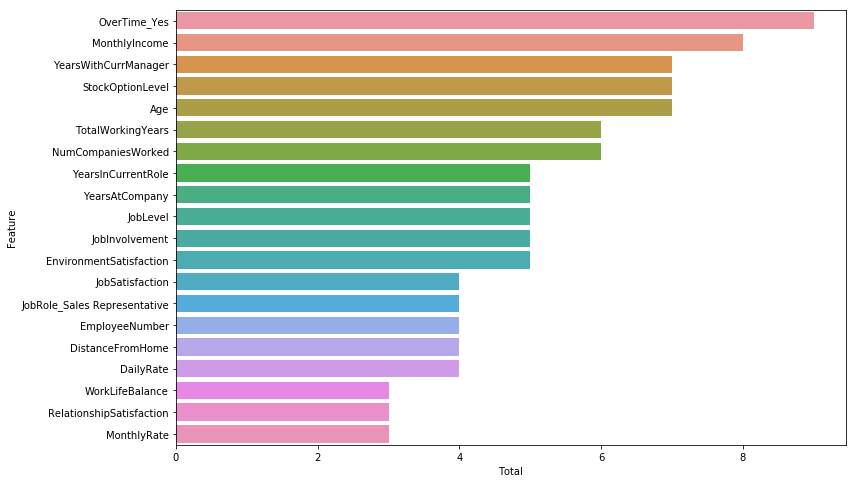

In [123]:
# Top 20 features impacting Attrition
import seaborn as sns
from matplotlib import pyplot


dims = (12, 8)

fig, ax = pyplot.subplots(figsize=dims)
sns.barplot(y="Feature", x="Total", data=feature_selection_df[:20])